# Finding The best State to invest in

### Using the address data set to determine the best place to expand business in

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the address sheet from the excel file and store it in a dataframe
address = pd.read_excel('KPMG_data.xlsx', sheet_name=4)
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [3]:
# check the end of the file and its shape
print(address.shape)
address.tail()

(3999, 6)


,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


##### Number of ID is more than the number of data so there is a missing IDs

In [4]:
# TO find number of missing data at each column
address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [15]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


##### we can see that there is no missing values but a mistake in the order of the Customers ID

In [5]:
# check if any duplicated values
address['customer_id'].duplicated().sum()


0

##### No duplicate values

In [6]:
# Find the missing ID
i = 0
for n in address['customer_id']:
    i += 1
    if n-1 != i-1:
        print(str(n) + ", ", end='')
        i = n

4, 11, 24, 

##### By checking the dataset in Excel we found that the problem is with IDs [3, 10, 22, 23]

### Next step is to standardizing the state 

In [7]:
# check the available values in the state column
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

##### we see that there are 5 values used but the actual states are only 3, now change values with Victoria to VIC and New South Wales to NSW

In [8]:
address.replace('Victoria', 'VIC', inplace=True)
address.replace('New South Wales', 'NSW', inplace=True)
# check if the change happened
address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

### Now compare the number of addresses w.r.t. the population in the state and see the percentage of potential customers

In [9]:
customers = address['state'].value_counts().astype('float')
# population at each state as per https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/sep-2021
pop_in_state = [8186.8, 6643.1, 5240.5]
for i in range(3):
    customers[i] = round(customers[i] / pop_in_state[i] , 4)*100
customers

NSW    26.14
VIC    15.37
QLD    15.99
Name: state, dtype: float64

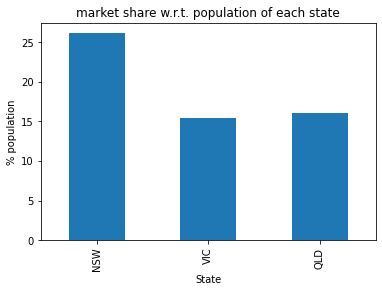

In [10]:

customers.plot(kind='bar')
plt.xlabel('State') 
plt.ylabel('% population') 
plt.title('market share w.r.t. population of each state') 

plt.show()

In [11]:
# Visualization of the population of each state with the total population of the country
AUS_popu = 25750.2
pop_in_state = {'NSW': 8186.8, 'VIC': 6643.1, 'QLD': 5240.5}
pop = pd.Series(pop_in_state)
pop = pop/AUS_popu *100
pop



NSW    31.793151
VIC    25.798246
QLD    20.351298
dtype: float64

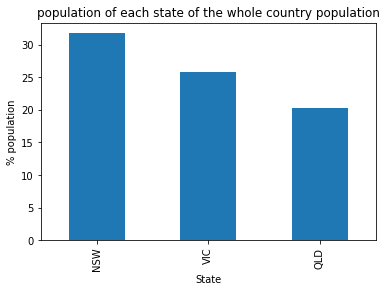

In [12]:
pop.plot(kind='bar')
plt.xlabel('State') 
plt.ylabel('% population') 
plt.title('population of each state of the whole country population') 

plt.show()

In [13]:
# Save in CSV file
address.to_csv('Address_cleaned.csv', index=False)

#### Conculsion